In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Strategy & Intelligence  - Copy of User Behaviour 1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         50 non-null     object
 1   UniqueUsers   50 non-null     object
 2   TotalLogin    50 non-null     object
 3   applied1-30   50 non-null     int64 
 4   applied31-50  50 non-null     int64 
 5   applied51-75  50 non-null     int64 
 6   ReachedCap    50 non-null     int64 
 7   PaidforMore   50 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.2+ KB


In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
for col in df.columns:
  if df[col].dtypes=='object':
    df[col] = df[col].str.replace(',', '').astype('int64')

In [ ]:
df.head()

,Month,UniqueUsers,TotalLogin,applied1-30,applied31-50,applied51-75,ReachedCap,PaidforMore
0,2019-01-01,304058,851788,241450,12058,5340,2395,0
1,2019-02-01,283402,724386,227930,9859,4257,1761,0
2,2019-03-01,345299,971469,249214,11530,5103,2109,0
3,2019-04-01,270927,684370,218651,8776,3845,1612,0
4,2019-05-01,256609,614606,218483,8350,3476,1405,0


<Axes: >

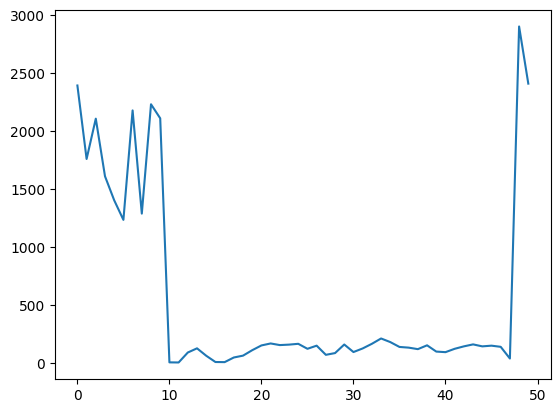

In [ ]:
df['ReachedCap'].plot()

<Axes: ylabel='ReachedCap'>

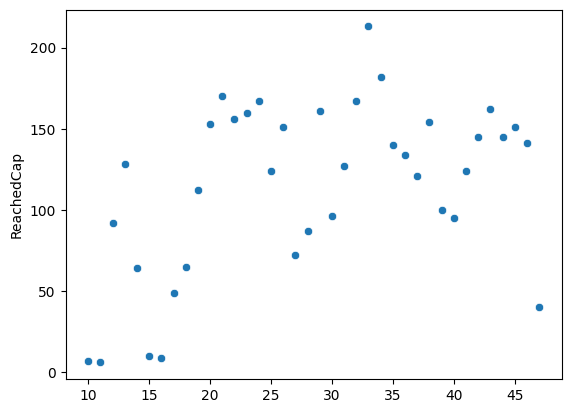

In [ ]:
sns.scatterplot(df['ReachedCap'].iloc[10:48])

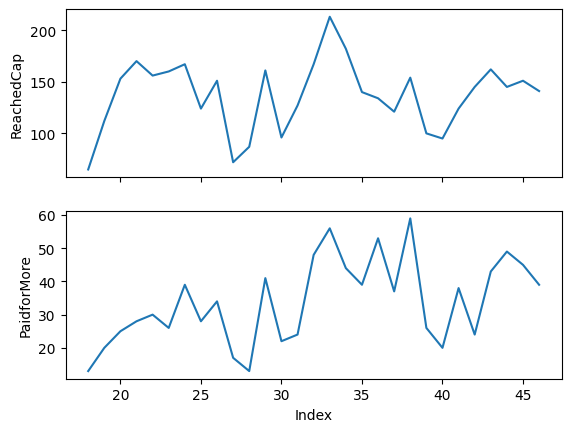

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

df['ReachedCap'].iloc[18:47].plot(ax=ax1)
ax1.set_ylabel('ReachedCap')

df['PaidforMore'].iloc[18:47].plot(ax=ax2)
ax2.set_ylabel('PaidforMore')

plt.xlabel('Index')
plt.show()
plt.savefig('Reached Cap vs Paid More.png')

<Axes: ylabel='ReachedCap'>

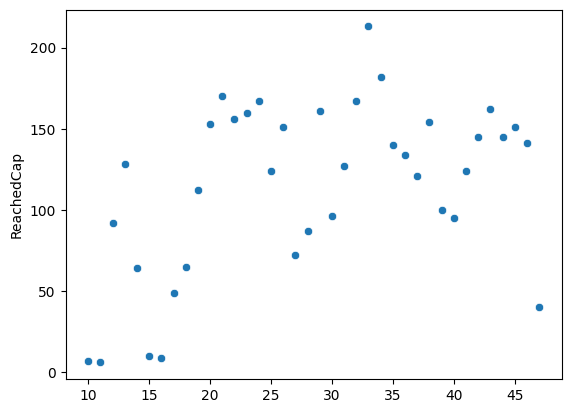

In [ ]:
sns.scatterplot(df['ReachedCap'].iloc[10:48])

<Axes: >

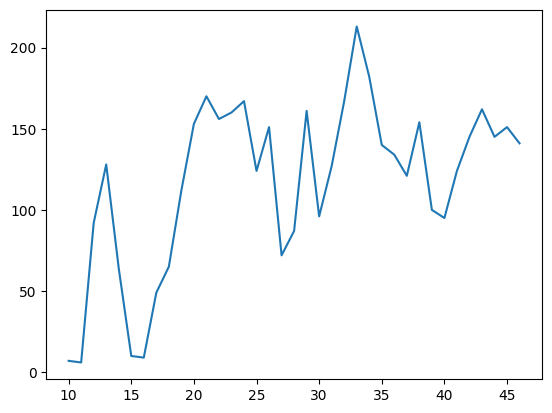

In [ ]:
df['ReachedCap'].iloc[10:47].plot()

In [ ]:
df.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

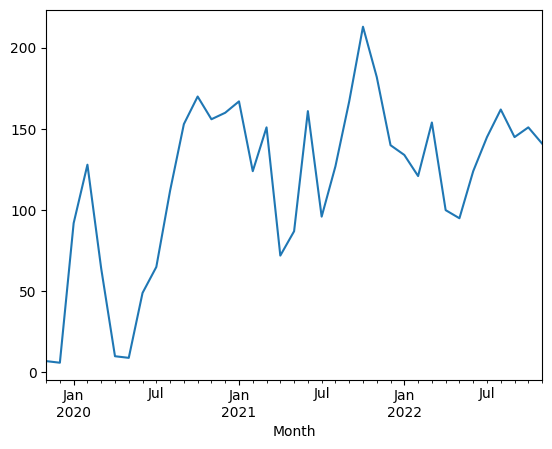

In [ ]:
df['ReachedCap'].iloc[10:47].plot()

In [ ]:
df['ReachedCap'].iloc[10:47]

Month
2019-11-01      7
2019-12-01      6
2020-01-01     92
2020-02-01    128
2020-03-01     64
2020-04-01     10
2020-05-01      9
2020-06-01     49
2020-07-01     65
2020-08-01    112
2020-09-01    153
2020-10-01    170
2020-11-01    156
2020-12-01    160
2021-01-01    167
2021-02-01    124
2021-03-01    151
2021-04-01     72
2021-05-01     87
2021-06-01    161
2021-07-01     96
2021-08-01    127
2021-09-01    167
2021-10-01    213
2021-11-01    182
2021-12-01    140
2022-01-01    134
2022-02-01    121
2022-03-01    154
2022-04-01    100
2022-05-01     95
2022-06-01    124
2022-07-01    145
2022-08-01    162
2022-09-01    145
2022-10-01    151
2022-11-01    141
Name: ReachedCap, dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df['ReachedCap'].iloc[10:47])
adftest[1]

0.024407985561712007

In [ ]:
df.reset_index(inplace=True)
from sklearn.model_selection import train_test_split
X=df['Month'].iloc[10:47]
y=df['ReachedCap'].iloc[10:47]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.ARIMAX(df['ReachedCap'].iloc[10:47],order=(0,2,1))
result=model.fit()

AttributeError: ignored

In [ ]:
prediction=result.predict(20,len(df['ReachedCap'].iloc[10:47]))
len(prediction)

18

In [ ]:
prediction

30    169.104419
31    100.449087
32    132.713488
33    174.272098
34    221.956109
35    189.291037
36    145.319062
37    138.883627
38    125.221119
39    159.249203
40    103.205533
41     97.931927
42    127.773132
43    149.311681
44    166.696338
45    149.057918
46    155.113433
47    144.721185
Name: predicted_mean, dtype: float64

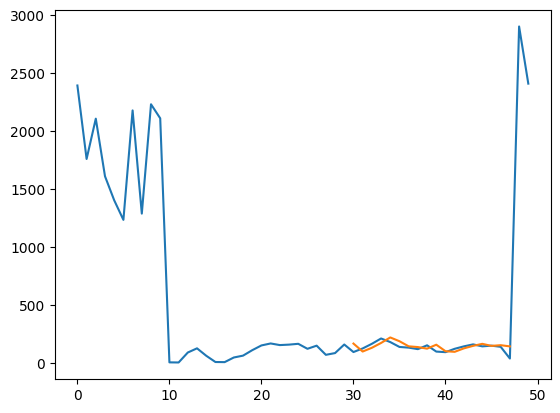

In [ ]:
df['Forecast']=prediction
plt.plot(df[['ReachedCap','Forecast']])

In [ ]:
len(df['ReachedCap'].iloc[29:47]),len(df['Forecast'].dropna())

(18, 18)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

df['ReachedCap'].iloc[18:47].plot(ax=ax1)
ax1.set_ylabel('ReachedCap')

df['PaidforMore'].iloc[18:47].plot(ax=ax2)
ax2.set_ylabel('PaidforMore')

plt.xlabel('Index')
plt.show()

In [ ]:
df['applied51-75'].mean()

4344.2

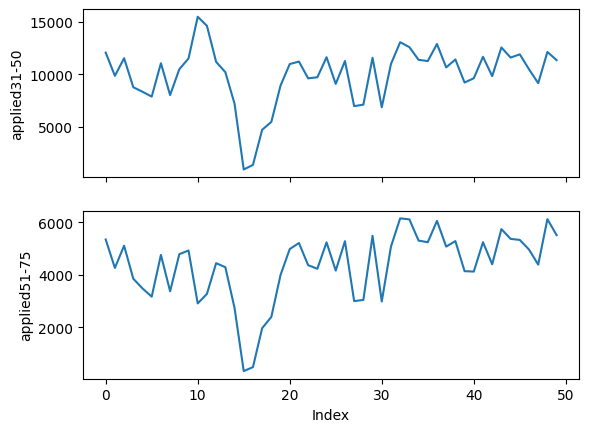

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

df['applied31-50'].plot(ax=ax1)
ax1.set_ylabel('applied31-50')

df['applied51-75'].plot(ax=ax2)
ax2.set_ylabel('applied51-75')

plt.xlabel('Index')
plt.show()

In [ ]:
df['ReachedCap'].iloc[10:48].mean()

115.26315789473684

In [ ]:
df['ReachedCap'].iloc[10:47].mean()

117.29729729729729

In [ ]:
df[df['Month']>='2019-04-01']

,index,Month,UniqueUsers,TotalLogin,applied1-30,applied31-50,applied51-75,ReachedCap,PaidforMore,Forecast
3,3,2019-04-01,270927,684370,218651,8776,3845,1612,0,NaN
4,4,2019-05-01,256609,614606,218483,8350,3476,1405,0,NaN
5,5,2019-06-01,264671,599805,223153,7889,3162,1236,0,NaN
6,6,2019-07-01,300220,745938,247507,11049,4752,2180,0,NaN
7,7,2019-08-01,258096,594715,225459,8035,3367,1290,0,NaN
8,8,2019-09-01,293662,733166,243272,10486,4781,2233,0,NaN
9,9,2019-10-01,325558,840664,261042,11501,4921,2112,0,NaN
10,10,2019-11-01,305196,760302,264028,15457,2905,7,0,NaN
11,11,2019-12-01,294592,745614,252225,14598,3267,6,0,NaN
12,12,2020-01-01,288233,778396,243501,11182,4438,92,0,NaN


In [ ]:
df['applied51-75'].mean()

4344.2